# Supervised machine learning



For a more complete explanations: http://cs229.stanford.edu/notes/cs229-notes1.pdf

- **Features** (input variables) $x^{(i)}\in \mathbb{X}$ 
- **Target** (output we are trying to predict) $y^{(i)} \in \mathbb{Y}$

$(x^{(i)},y^{(i)})$ is a **training example**

$\{(x^{(i)},y^{(i)}); i = 1,...,m\}$ is the **training set**

The goal of supervised learning is to learn a function $h: \mathbb{X}\mapsto\mathbb{Y}$, called the hypothesis, so that $h(x)$ is a good 
predictor of the corresponding $y$.

- **Regression** correspond to the case where $y$ is a continuous variable
- **Classification** correspond to the case where $y$ can only take a small number of discrete values

Examples: 
- Univariate Linear Regression: $h_w(x) = w_0+w_1x$,  with $\mathbb{X} = \mathbb{Y} = \mathbb{R}$
- Multivariate Linear Regression: $$h_w(x) = w_0+w_1x_1 + ... + w_nx_n = \sum_{i=0}^{n}w_ix_i = w^Tx,$$
with $\mathbb{Y} = \mathbb{R}$ and $\mathbb{X} = \mathbb{R^n}$.
Here $w_0$ is the intercept with the convention that $x_0=1$ to simplify notation.



## Binary Classification with Logistic Regression

- $y$ can take only two values, 0 or 1. For example, if $y$ is the sentiment associated with the tweet,
$y=1$ if the tweet is "positive" and $y=0$ is the tweet is "negative".

- $x^{(i)}$ represents the features of a tweet. For example the presence or absence of certain words.

- $y^{(i)}$ is the **label** of the training example represented by $x^{(i)}$.


Since $y\in\{0,1\}$ we want to limit $h_w(x)$ between $[0,1]$.

The **Logistic regression** consists of choosing $h_w(x)$ as

$$
h_w(x) = \frac{1}{1+e^{-w^Tx}}
$$

where $w^Tx = \sum_{i=0}^{n}w_ix_i$ and $h_w(x) = g(w^Tx)$ with

$$
g(x)=\frac{1}{1+e^{-x}}.
$$

$g(x)$ is the **logistic function** or **sigmoid function**


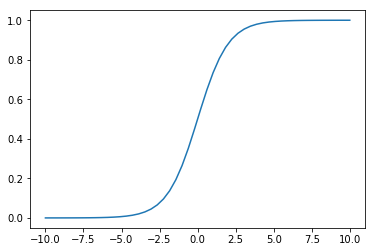

In [5]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

x = np.linspace(-10,10)
y = 1/(1+np.exp(-x))

p = plt.plot(x,y)

- $g(x)\rightarrow 1$ for $x\rightarrow\infty$
- $g(x)\rightarrow 0$ for $x\rightarrow -\infty$
- $g(0) = 1/2$

Finally, to go from the regression to the classification, we can simply apply the following condition:

$$
y=\left\{
  \begin{array}{@{}ll@{}}
    1, & \text{if}\ h_w(x)>=1/2 \\
    0, & \text{otherwise}
  \end{array}\right.
$$

Let's clarify the notation. We have $m$ training samples and $n$ features, our training examples can be represented by a $m$-by-$n$ matrix $\underline{\underline{X}}=(x_{ij})$ ($m$-by-$n+1$, if we include the intercept term) that contains the training examples, $x^{(i)}$, in its rows.

The target values of the training set can be represented as a $m$-dimensional vector $\underline{y}$ and the parameters 
of our model as
a $n$-dimensional vector $\underline{w}$ ($n+1$ if we take into account the intercept).

Now, for a given training example $x^{(i)}$, the function that we want to learn (or fit) can be written:

$$
h_\underline{w}(x^{(i)}) = \frac{1}{1+e^{-\sum_{j=0}^n w_j x_{ij}}}
$$


How to find the parameters, also called *weights*, $\underline{w}$ that best fit our training data?

We want to find the weights $\underline{w}$ that maximize the likelihood of observing the target $\underline{y}$ given the observed features $\underline{\underline{X}}$.


We need a probabilistic model the gives us the probability of observing the value $y^{(i)}$ given the features $x^{(i)}$.

The function $h_\underline{w}(x^{(i)})$ is precisely that:

$$
P(y^{(i)}=1|x^{(i)};\underline{w}) = h_\underline{w}(x^{(i)})
$$

$$
P(y^{(i)}=0|x^{(i)};\underline{w}) = 1 - h_\underline{w}(x^{(i)})
$$


we can write is more compactly as:

$$
P(y^{(i)}|x^{(i)};\underline{w}) = (h_\underline{w}(x^{(i)}))^{y^{(i)}} ( 1 - h_\underline{w}(x^{(i)}))^{1-y^{(i)}}
$$
where $y^{(i)}\in{0,1}$




The **Likelihood function** of a statistical model is defined as:
$$
\mathcal{L}(\underline{w}) = \mathcal{L}(\underline{w};\underline{\underline{X}},\underline{y}) = P(\underline{y}|\underline{\underline{X}};\underline{w}).
$$

The likelihood takes into account all the $m$ training samples of our training dataset.


$$
\mathcal{L}(\underline{w}) = P(\underline{y}|\underline{\underline{X}};\underline{w}) = \prod_{i=1}^m P(y^{(i)}|x^{(i)};\underline{w}) = \prod_{i=1}^m (h_\underline{w}(x^{(i)}))^{y^{(i)}} ( 1 - h_\underline{w}(x^{(i)}))^{1-y^{(i)}}
$$

This is the function that we want to maximize. It is usually much simpler maximize the logarithm of this function, which is equivalent.

$$
l(\underline{w}) = \log\mathcal{L}(\underline{w}) = \sum_{i=1}^{m} \left(y^{(i)} \log h_\underline{w}(x^{(i)}) + (1- y^{(i)})\log(1- h_\underline{w}(x^{(i)})) \right)
$$